# Deep learning with vanilla CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers

In [2]:
data_train = tfds.load("deep_weeds", with_info=False, split='train[20%:100%]').take(800)#.filter(lambda x: x['label'] != 8).take(800)
data_valid  = tfds.load("deep_weeds", with_info=False, split='train[0%:20%]').take(200)#.filter(lambda x: x['label'] != 8).take(160)

In [3]:
import math

def preprocess(dict):
  processed_image = dict['image'] / 255
  processed_label = dict['label']
  return processed_image, processed_label

# Use the batch method to prepare batches.
train_ds = (data_train
                .map(preprocess)
                .cache()
                .batch(32)
                .prefetch(tf.data.experimental.AUTOTUNE))

valid_ds = data_valid.map(preprocess).cache().batch(32)

## A neural network model with convolutional layers

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 9

model = keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [5]:
log = model.fit(
    train_ds, epochs=50, validation_data=valid_ds,
)

Epoch 1/50
25/25 [==============================] - 5s 74ms/step - loss: 5.0481 - accuracy: 0.4825 - val_loss: 5.5950 - val_accuracy: 0.5400
Epoch 2/50
25/25 [==============================] - 1s 58ms/step - loss: 2.9984 - accuracy: 0.1488 - val_loss: 2.1972 - val_accuracy: 0.0550
Epoch 3/50
25/25 [==============================] - 1s 57ms/step - loss: 2.1972 - accuracy: 0.0662 - val_loss: 2.1972 - val_accuracy: 0.0550
Epoch 4/50
25/25 [==============================] - 1s 57ms/step - loss: 2.1972 - accuracy: 0.0662 - val_loss: 2.1972 - val_accuracy: 0.0550
Epoch 5/50
25/25 [==============================] - 1s 57ms/step - loss: 2.1972 - accuracy: 0.0662 - val_loss: 2.1972 - val_accuracy: 0.0550
Epoch 6/50
25/25 [==============================] - 1s 58ms/step - loss: 2.1972 - accuracy: 0.0662 - val_loss: 2.1972 - val_accuracy: 0.0550
Epoch 7/50
25/25 [==============================] - 1s 58ms/step - loss: 2.1972 - accuracy: 0.0662 - val_loss: 2.1972 - val_accuracy: 0.0550
Epoch 8/50
25

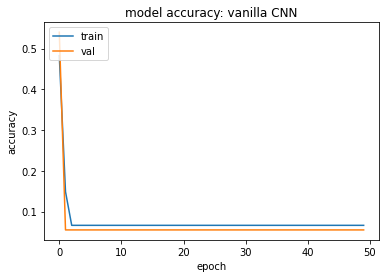

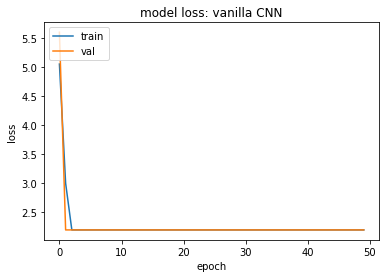

In [23]:
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('model accuracy: vanilla CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss: vanilla CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()